In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
def load_data(directory):
    documents = []
    for filename in os.listdir(directory):
        if filename.endswith('_main_text.txt'):  # Assuming these are the main text files
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                text = file.read().strip()
                # Optionally, split text into sentences
                documents.extend(text.split('. '))  # Split by sentence for clustering
    return documents


In [3]:
def cluster_based_summarization(documents, num_clusters=5):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(documents)

    # Clustering sentences
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(X)
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)

    # Selecting one representative sentence per cluster
    summary = [documents[idx] for idx in closest]
    
    # Return summary and clustering model for further analysis
    return ' '.join(summary), X, kmeans, closest

In [4]:
# !pip install umap-learn


In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

def plot_clusters(X, kmeans, documents, closest, method="PCA"):
    # Choose the dimensionality reduction method
    if method == "PCA":
        reducer = PCA(n_components=2, random_state=42)
    elif method == "t-SNE":
        reducer = TSNE(n_components=2, random_state=42)
    elif method == "UMAP":
        reducer = umap.UMAP(n_components=2, random_state=42)
    else:
        raise ValueError("Unsupported dimensionality reduction method: choose 'PCA', 't-SNE', or 'UMAP'.")

    reduced_X = reducer.fit_transform(X.toarray())
    
    plt.figure(figsize=(10, 8))
    
    # Plot each cluster with a different color
    for cluster in range(kmeans.n_clusters):
        points = reduced_X[kmeans.labels_ == cluster]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster + 1}', alpha=0.5)
    
    # Highlight the representative sentences
    for idx in closest:
        plt.scatter(reduced_X[idx, 0], reduced_X[idx, 1], color='black', marker='x', s=100, label='Representative')

    plt.title(f'Sentence Clusters and Representative Sentences ({method})', fontweight='bold')
    plt.xlabel(f'{method} Component 1')
    plt.ylabel(f'{method} Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()


/mnt/data/skanda/mambaforge/envs/gpu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-28 01:10:14.286556: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/mnt/data/skanda/mambaforge/envs/gpu/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Summary:
0/ 0/ 0/ 0/ 0/


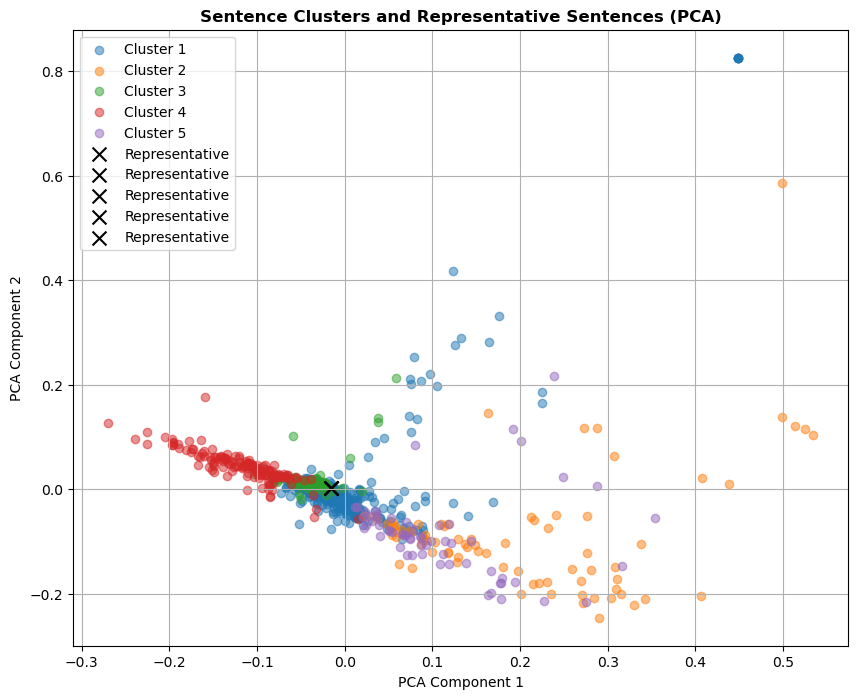

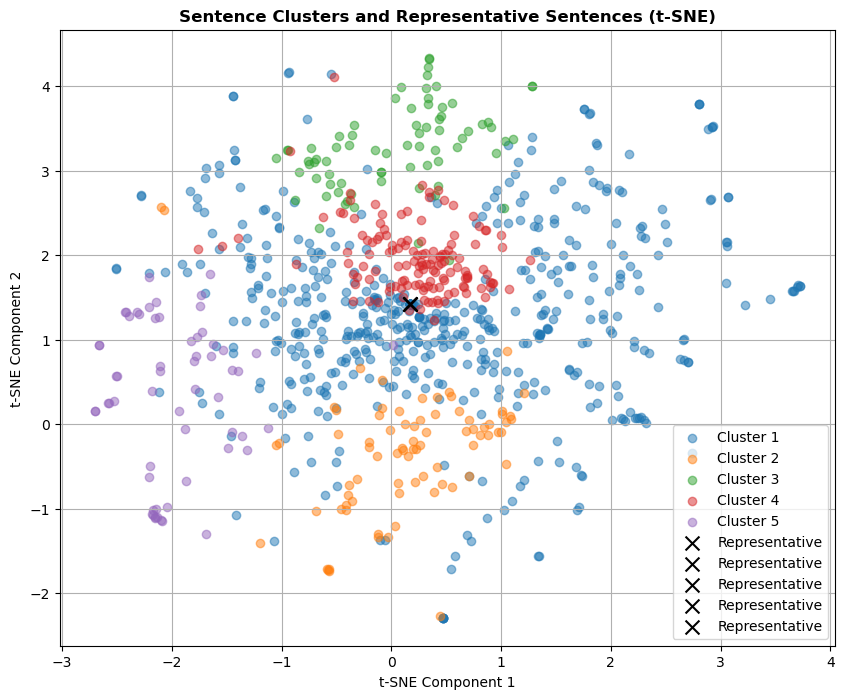

/mnt/data/skanda/mambaforge/envs/gpu/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


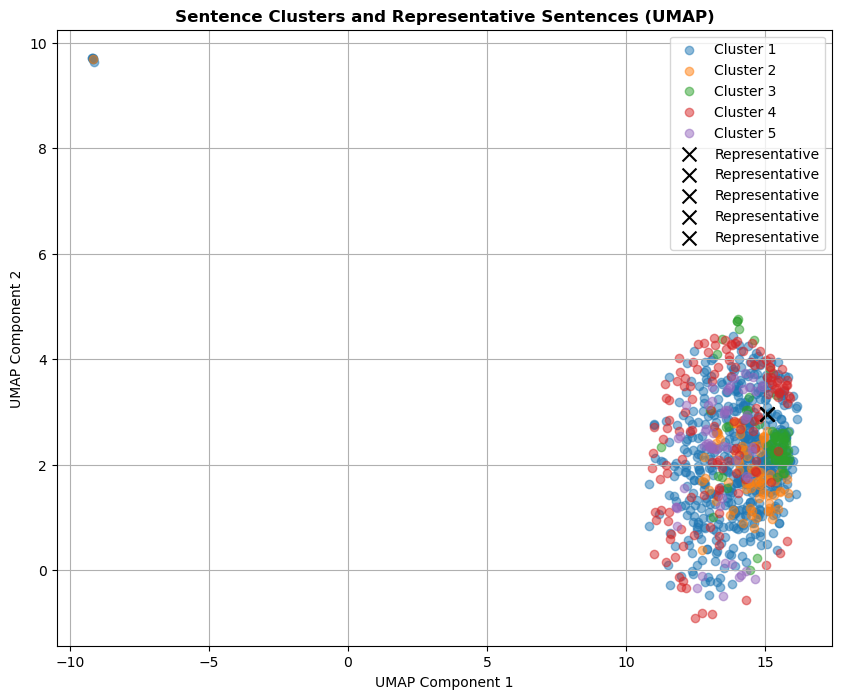

In [6]:
def main():
    sample_papers_dir = '/mnt/data/skanda/MSc_IRD_LLM/data/data_separated'

    # Load documents from the directory
    documents = load_data(sample_papers_dir)

    # Generate the summary and get clustering information
    summary, X, kmeans, closest = cluster_based_summarization(documents, num_clusters=5)
    
    print("Summary:")
    print(summary)

    # Plot clusters using PCA, t-SNE, and UMAP
    for method in ["PCA", "t-SNE", "UMAP"]:
        plot_clusters(X, kmeans, documents, closest, method=method)

if __name__ == "__main__":
    main()